In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

print(os.getcwd())

g:\My Drive\1. EIT Digital master\Estland\Semester 1\Computer vision\its8030-2021-hw2\Code


In [5]:
os.chdir("g:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Computer vision\\its8030-2021-hw2\\")

(708, 584)


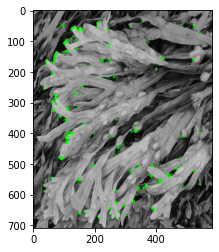

(<matplotlib.image.AxesImage at 0x202eec06cd0>, None)

In [3]:
img = cv2.imread('Etalons/Fucus/fucus_15.jpg',0)
print(img.shape)


# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [40]:
# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg 
query_img_bw = cv2.imread('Etalons/Zostera marina/zostera_marina_46.jpg',0)
#query_img_bw = cv2.imread('Processed images/Zostera marina/zostera_marina_2.jpg',0)
train_img_bw = cv2.imread('Processed images/Zostera marina/zostera_marina_20.jpg',0)

print(query_img_bw.shape)
  
# Convert it to grayscale
# query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
# train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
  
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()
  
# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
 
# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints

#matcher = cv2.DescriptorMatcher_create('BruteForce-L1') #BruteForce = L2, BruteForce-L1
matcher = cv2.BFMatcher(cv2.NORMCONV_FILTER)
matches = matcher.match(queryDescriptors,trainDescriptors)
  

matches = sorted(matches, key = lambda x:x.distance)
# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img_bw, queryKeypoints,
train_img_bw, trainKeypoints, matches[:20],None)
  
final_img = cv2.resize(final_img, (1000,650))
 
# Show the final image
cv2.imshow("Matches", final_img)
cv2.waitKey(0)

(477, 325)


-1

In [31]:
#ORB number of descriptors change with the img height

print(queryDescriptors.shape)
print(trainDescriptors.shape)

(35, 32)
(500, 32)
